# Predicting Subscription Numbers of JYB Telemarketing Dataset: Exploratory Data Analysis and Cleaning


<em>"The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed."</em> - <a href="https://www.kaggle.com/datasets/aguado/telemarketing-jyb-dataset">Telemarketing JYB Dataset on Kaggle</a><br>

The problem is a simple Binary Classifcation problem, to determine whether a customer will subscribe based on collected data.
The dataset is comprised of:
- Bank client data.
- Previous contact data.
- Social and economic attributes.
<br><br>
<b>In this notebook we explore and analyse the data as well as clean up the dataset.</b>

## Import Libaries and Data
Here the frameworks Pandas, Pyplot and Seaborn are imported in order to load and visualise the data.<br>
A custom script 'data_cleaning' is imported containing functions to clean the data.<br>
Load the training data into the dataframe 'df'

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append("../src/")
import data_cleaning as dclean

df = pd.read_csv('../data/raw/train.csv', index_col=None, delimiter=";")

## Cleaning the Data
To clean the data we drop the unnamed columns which provide no useful information.<br>
We rename the columns into an easier-to-interpret format.<br>
Finally we check for null-values.

In [2]:
df = dclean.drop_unnamed(df)
df = dclean.rename_columns(df)
dclean.check_null(df)

print(f"Dataframe shape (examples, features): {df.shape}")

df.head()

Dropping unnamed columns.
Renaming columns.
No null values.
Dataframe shape (examples, features): (28645, 20)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,prev_days,prev_nr_contacts,prev_outcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3_month,nr_employed,subscribed
0,52,technician,married,high.school,no,yes,no,cellular,nov,tue,1,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
1,33,admin.,single,university.degree,no,yes,no,cellular,nov,thu,1,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,no
2,54,admin.,single,university.degree,no,yes,no,cellular,may,mon,1,999,0,nonexistent,-1.8,92.893,-46.2,1.264,5099.1,no
3,53,housemaid,married,high.school,no,no,yes,cellular,jun,thu,1,999,2,failure,-2.9,92.963,-40.8,1.260,5076.2,yes
4,42,self-employed,married,university.degree,unknown,yes,no,cellular,aug,tue,2,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


### Categorical
Although there were no null values detected, the dataset is riddled with the categorical label 'unknown'. Here we drop the categorical features with an 'unknown' proportion greater than 10% and drop rows with less than 10% 'unkown'.

In [3]:
cat_cols, categories = dclean.get_categorical_columns(df)
print(f"Categorical columns:\n{cat_cols}")
df = dclean.drop_labels(df, threshold=0.1, label='unknown')       
print(f"Dataframe shape (examples, features): {df.shape}")

Categorical columns:
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'prev_outcome', 'subscribed']
Dropped columns with 'unknown' proportion > 10.0% and rows with < 10.0%
Dropped columns: ['default'].
Dataframe shape (examples, features): (26569, 19)


### Numerical
Plot all the numerical distributions as histograms.

Numerical columns:
['age', 'campaign', 'prev_days', 'prev_nr_contacts', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor_3_month', 'nr_employed']


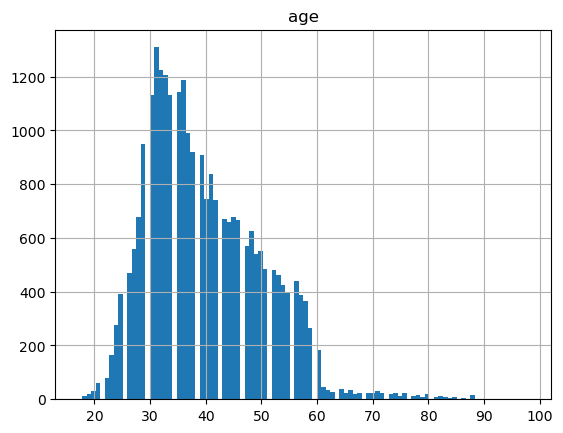

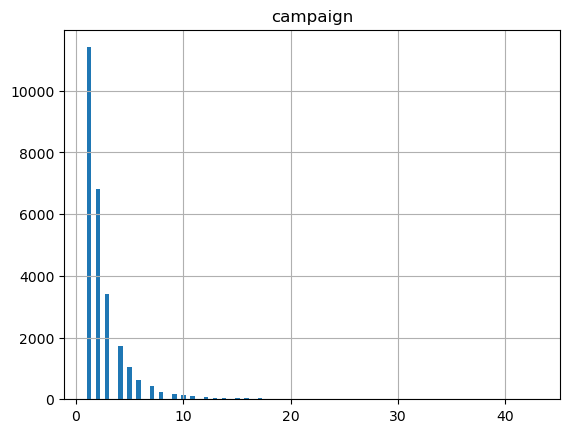

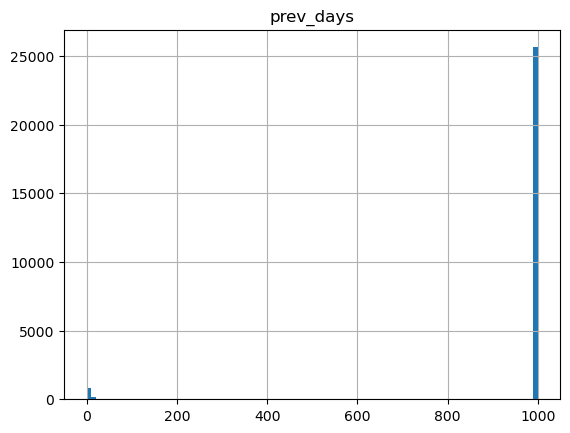

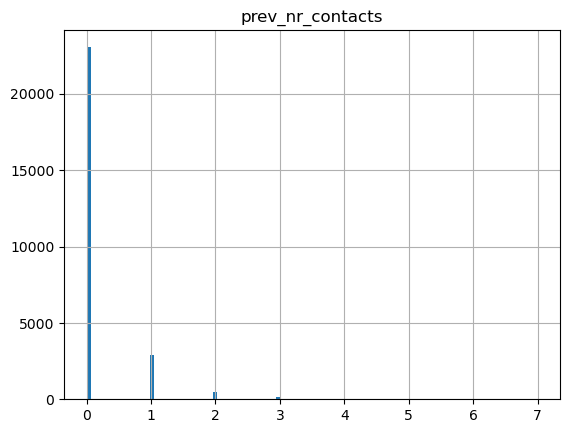

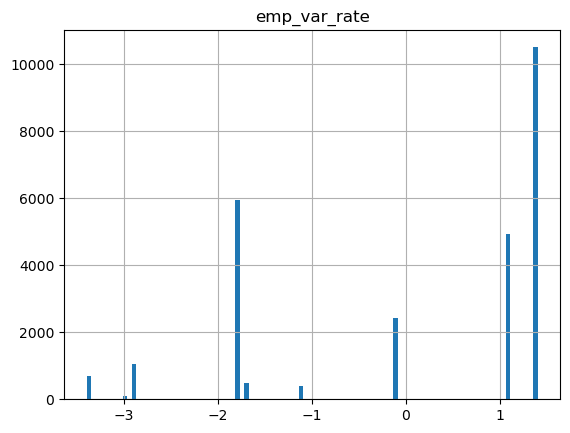

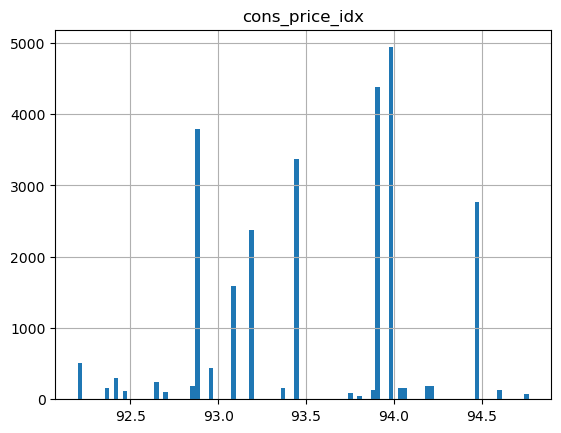

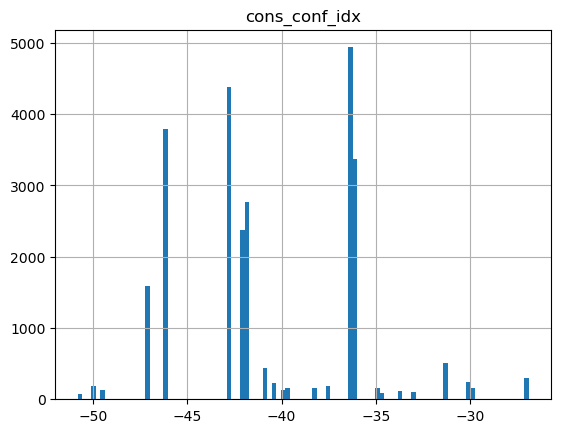

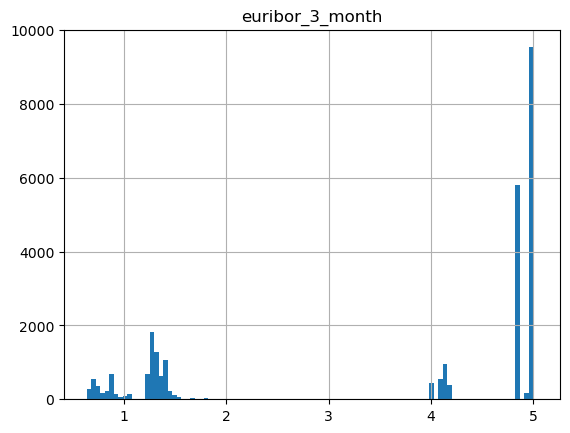

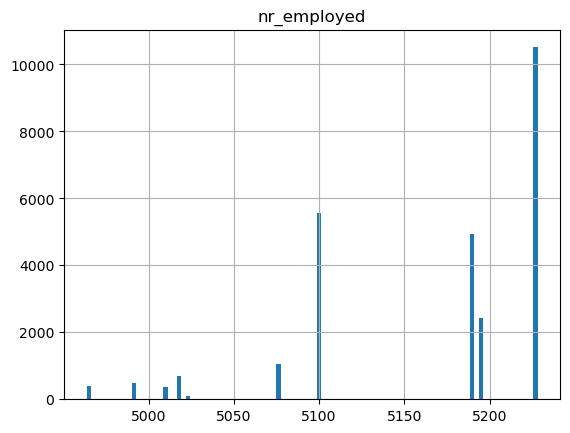

In [4]:
num_cols = dclean.get_numeric_columns(df)
print(f"Numerical columns:\n{num_cols}")
for col in num_cols:
    df.hist(col, bins=100)

Here 'prev_days' has the majority of values at 999 which does not match up with 'prev_nr_contacts' and so must be bad data therefore we drop this column.

In [5]:
df = dclean.drop_anomolous(df)

Dropped columns: ['prev_days']


## EDA
### Pairplot
Perform a pairplot to look at the distributions with respect to our target 'subscribed', this target is what we will be predicting.

Numerical Features


<Figure size 640x480 with 0 Axes>

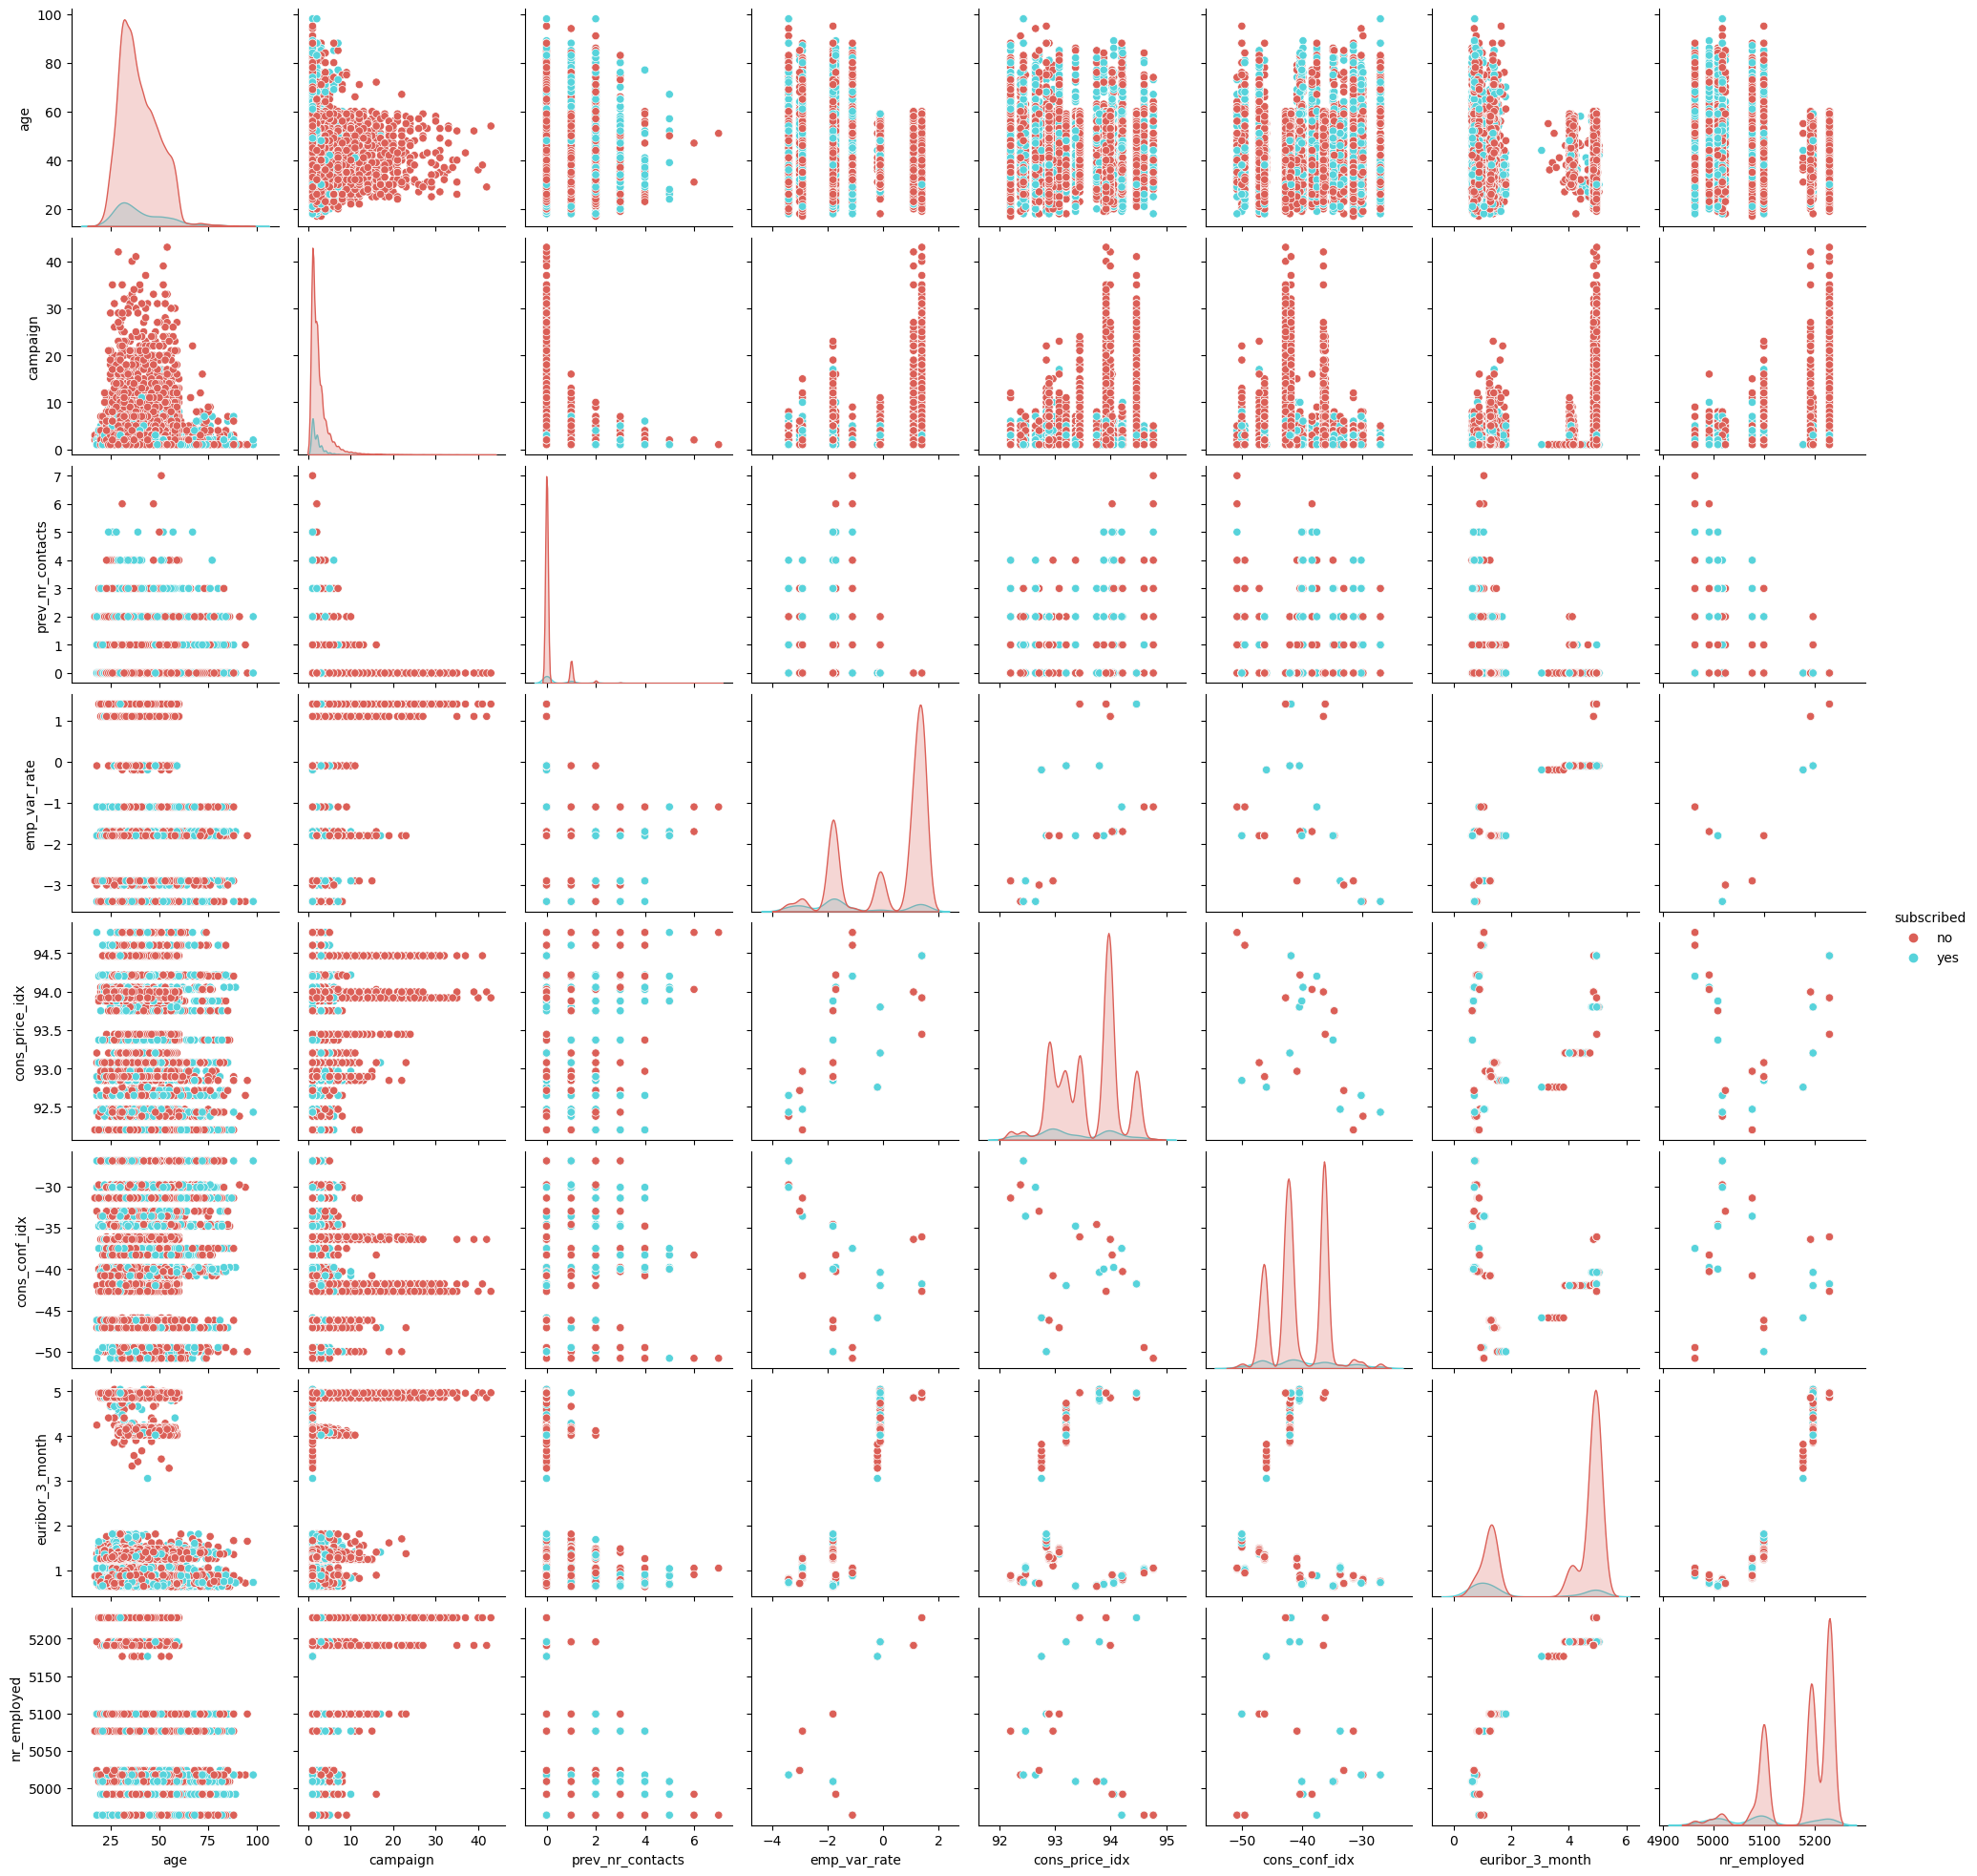

In [6]:
print("Numerical Features")
plt.figure()
sns.pairplot(df, hue='subscribed', palette='hls') 
plt.show()

### Correlation Matrix
We plot the correlation matrix in order to look for highly correlated features with the intention to drop them in order to reduce the complexity of our data.

<AxesSubplot:>

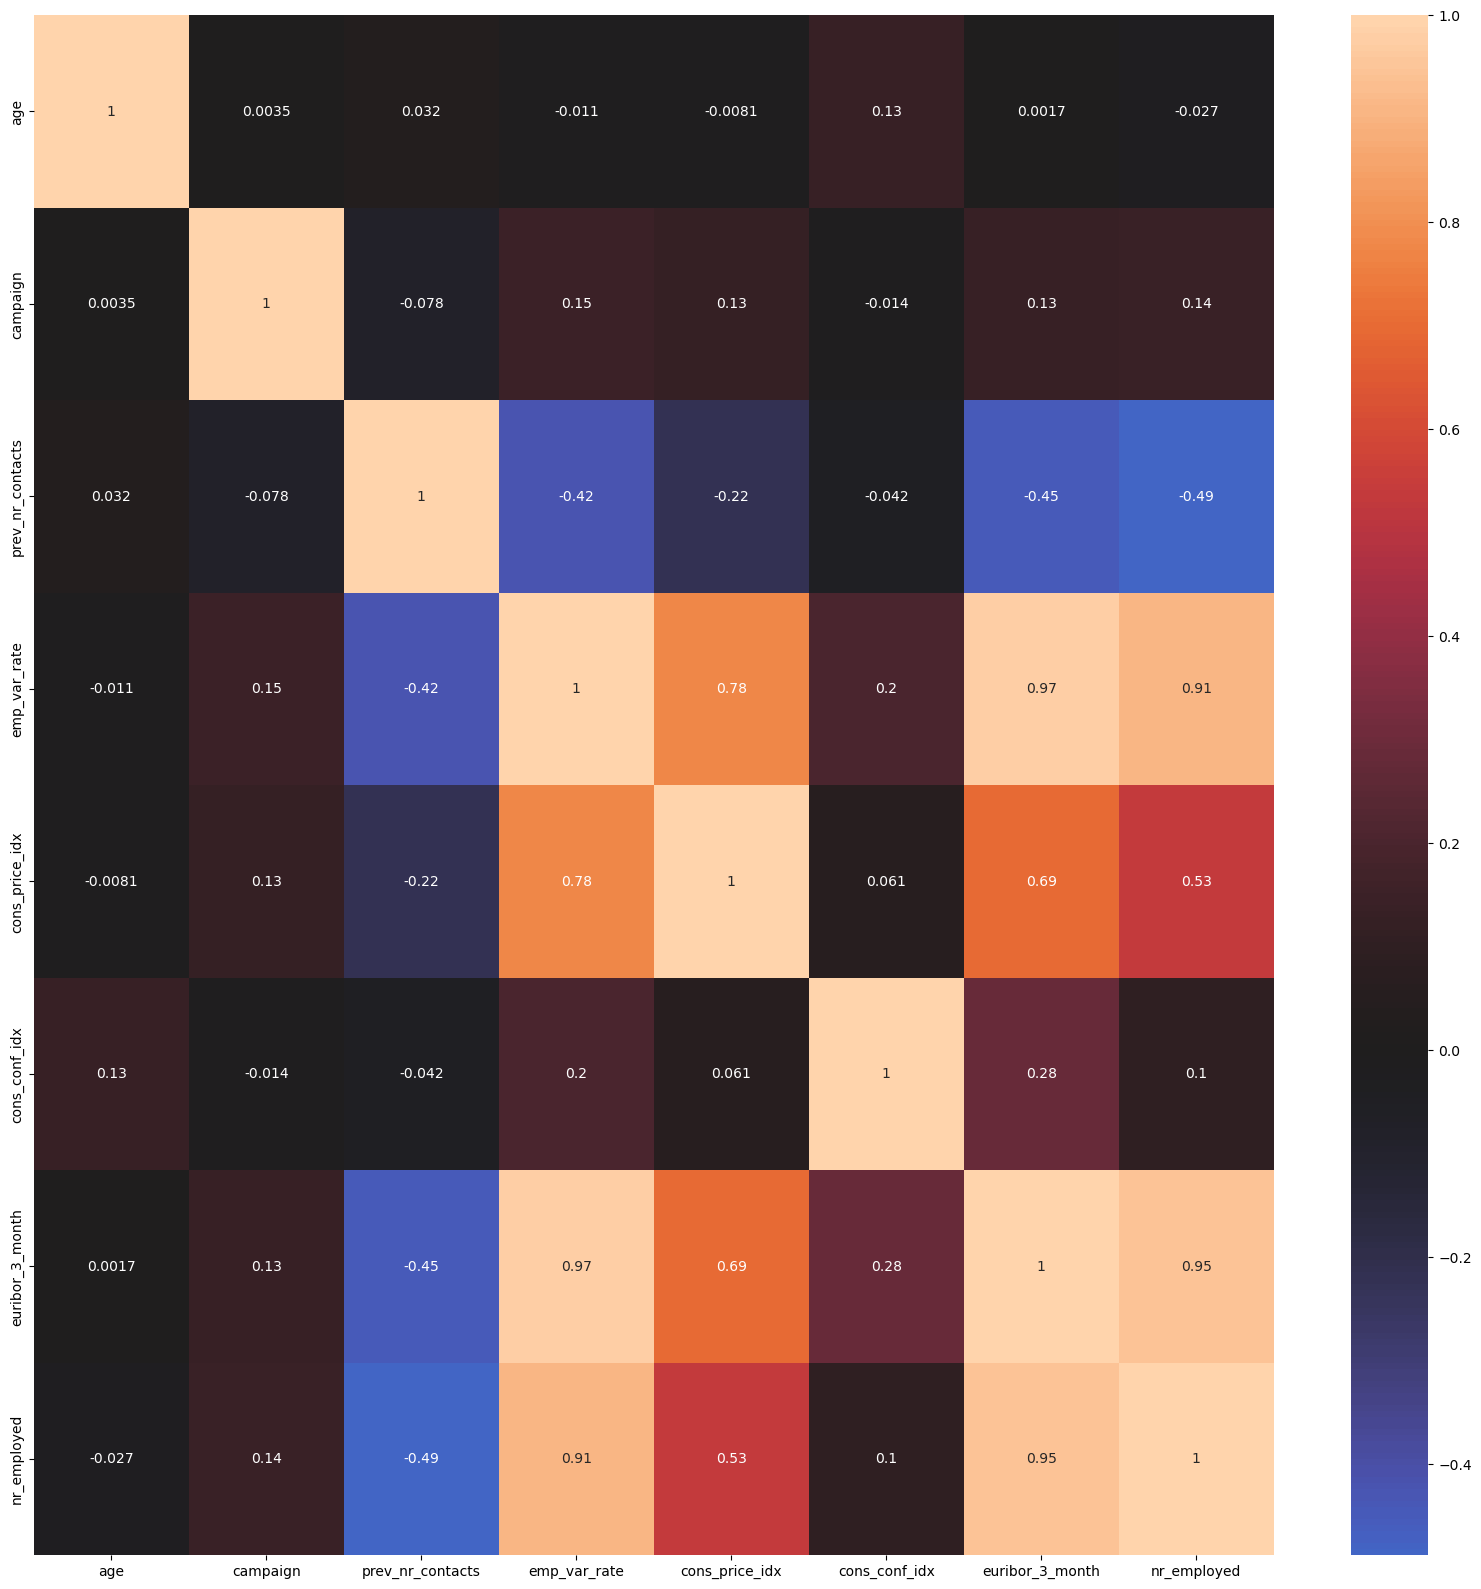

In [7]:
corr_matrix = df.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corr_matrix, annot=True, center=0)

Here it can be seen that 'emp_var_rate' and 'euribor_3_month' are highly correlated with eachother and 'nr_employed'. We choose to drop these first 2 and keep the last.

In [8]:
corr_cols = ['emp_var_rate', 'euribor_3_month']
df = df.drop(columns=corr_cols)

## Skewedness
It can be seen that the dataset is very skewed, with roughly only 11% of positive examples. This will need to be considered in the data preparation for training.

In [9]:
print(f"Percentage positive examples: {float((df[['subscribed']]=='yes').sum()/len(df)*100):.2f}%")

Percentage positive examples: 11.34%


## Export Cleaned Data
Export the clean data to 'data_clean.csv'.

In [10]:
# Write to output
df.to_csv('../data/interim/data_clean.csv')

In [12]:
df.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,prev_nr_contacts,prev_outcome,cons_price_idx,cons_conf_idx,nr_employed,subscribed
0,52,technician,married,high.school,yes,no,cellular,nov,tue,1,0,nonexistent,93.200,-42.0,5195.8,no
1,33,admin.,single,university.degree,yes,no,cellular,nov,thu,1,0,nonexistent,93.200,-42.0,5195.8,no
2,54,admin.,single,university.degree,yes,no,cellular,may,mon,1,0,nonexistent,92.893,-46.2,5099.1,no
3,53,housemaid,married,high.school,no,yes,cellular,jun,thu,1,2,failure,92.963,-40.8,5076.2,yes
4,42,self-employed,married,university.degree,yes,no,cellular,aug,tue,2,0,nonexistent,93.444,-36.1,5228.1,no
